ID : 학습 데이터 고유 ID
Age  
Gender  
Education_Status  
Employment_Status  
Working_Week (Yearly)  
Industry_Status  
Occupation_Status  
Race  
Hispanic_Origin  
Martial_Status  
Household_Status  
Household_summary  
Citizenship  
Birth_Country  
Birth_Country (Father)  
Birth_Country (Mother)  
Tax_Status  
Gains  
Losses  
Divdends  
Incom_Status  
Income : 예측 목표, 1시간 단위의 소득을 예측

# 패키지 가져오기

In [203]:
import pandas as pd
import numpy as np
import random
import os

import datetime
from pytz import timezone

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from modules.preprocess import *

# 디렉토리 설정

In [2]:
os.getcwd()

'C:\\Users\\LukeLim\\OneDrive\\바탕 화면\\Projects\\Dacon\\income'

# 데이터 가져오기

In [6]:
train_org = pd.read_csv('./dataset/train.csv')

In [76]:
display(train_org.head().iloc[:, :10])
display(train_org.head().iloc[:, 10:])

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other


,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,Binary_income
0,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425,1
1,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0,0
2,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860,1
3,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850,1
4,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570,1


## 데이터 살펴보기

In [89]:
def groups(df, col, zero_income=True):
    if zero_income:
        return df.groupby(col)['Income'].describe()
    else:
        return df.loc[train_org['Income'] > 0].groupby(col)['Income'].describe()
    
# Binary income: 수입 0인 경우 0, 아닐 경우 1
train_org['Binary_income'] = train_org['Income'].apply(lambda x: 0 if x == 0 else 1)

# 수입이 0인 사람들
zero_income = train_org.loc[train_org['Binary_income'] == 0]

# 수입이 0이 아닌 사람들
not_zero_income = train_org.loc[train_org['Binary_income'] == 1]

print(len(zero_income))
print(len(not_zero_income))

8697
11303


In [77]:
display(train_org.head().iloc[:, :10])
display(train_org.head().iloc[:, 10:])

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other


,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,Binary_income
0,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425,1
1,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0,0
2,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860,1
3,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850,1
4,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570,1


In [115]:
### 전체 데이터
col = 'Occupation_Status'

print('전체')
display(train_org[col].value_counts() / len(train_org) * 100)
print(len(train_org[col].value_counts()))
print()

print('수입 있음')
display(not_zero_income[col].value_counts() / len(not_zero_income) * 100)
print(len(not_zero_income[col].value_counts()))

print()
print('수입 없음')
display(zero_income[col].value_counts() / len(zero_income) * 100)

전체


Occupation_Status
Unknown                             23.440
Admin Support (include Clerical)    13.545
Services                            11.565
Craft & Repair                       9.345
Sales                                8.460
Professional                         7.440
Machine Operators & Inspectors       6.915
Management                           5.555
Handlers/Cleaners                    4.185
Transportation                       3.450
Technicians & Support                2.790
Farming & Forestry & Fishing         1.480
Protective Services                  1.300
Private Household Services           0.525
Armed Forces                         0.005
Name: count, dtype: float64

15

수입 있음


Occupation_Status
Admin Support (include Clerical)    18.888791
Services                            15.827656
Craft & Repair                      13.093869
Sales                               10.395470
Machine Operators & Inspectors      10.112360
Professional                         7.794391
Handlers/Cleaners                    5.998408
Management                           5.140228
Transportation                       4.795187
Technicians & Support                3.813147
Protective Services                  1.840219
Farming & Forestry & Fishing         1.548262
Private Household Services           0.752013
Name: count, dtype: float64

13

수입 없음


Occupation_Status
Unknown                             53.903645
Professional                         6.979418
Admin Support (include Clerical)     6.599977
Management                           6.094055
Services                             6.025066
Sales                                5.944579
Craft & Repair                       4.472807
Machine Operators & Inspectors       2.759572
Handlers/Cleaners                    1.828217
Transportation                       1.701736
Technicians & Support                1.460274
Farming & Forestry & Fishing         1.391284
Protective Services                  0.597907
Private Household Services           0.229964
Armed Forces                         0.011498
Name: count, dtype: float64

In [131]:
train_org.loc[train_org['Education_Status'] == 'Children'].groupby('Employment_Status')['Age'].mean()

Employment_Status
Children or Armed Forces    7.063859
Name: Age, dtype: float64

In [172]:
### 수입이 항상 0인 케이스 판별
#### Armed Force는 해결 필요. 케이스가 너무 적음

col = train_org.columns[4]
print(col)

train_org.groupby([col, 'Binary_income']).count()['ID'].reset_index().pivot(index=col, columns='Binary_income')

Employment_Status


ID        
Binary_income                       0       1
Employment_Status                            
Children or Armed Forces       5531.0  5611.0
Choice Part-Time                137.0   456.0
Full-Time                      1598.0  4990.0
Not Working                    1221.0     NaN
Part-Time (Usually Full-Time)    23.0    77.0
Part-Time (Usually Part-Time)    43.0   115.0
Seeking Full-Time               105.0    16.0
Seeking Part-Time                39.0    38.0

## 수치형 데이터 간의 상관관계

### Age

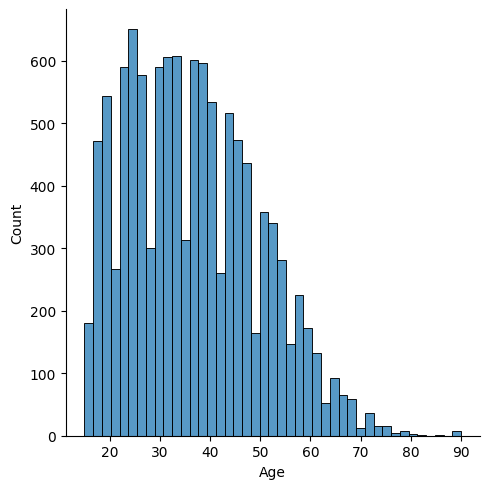

In [213]:
sns.displot(not_zero_income.Age)

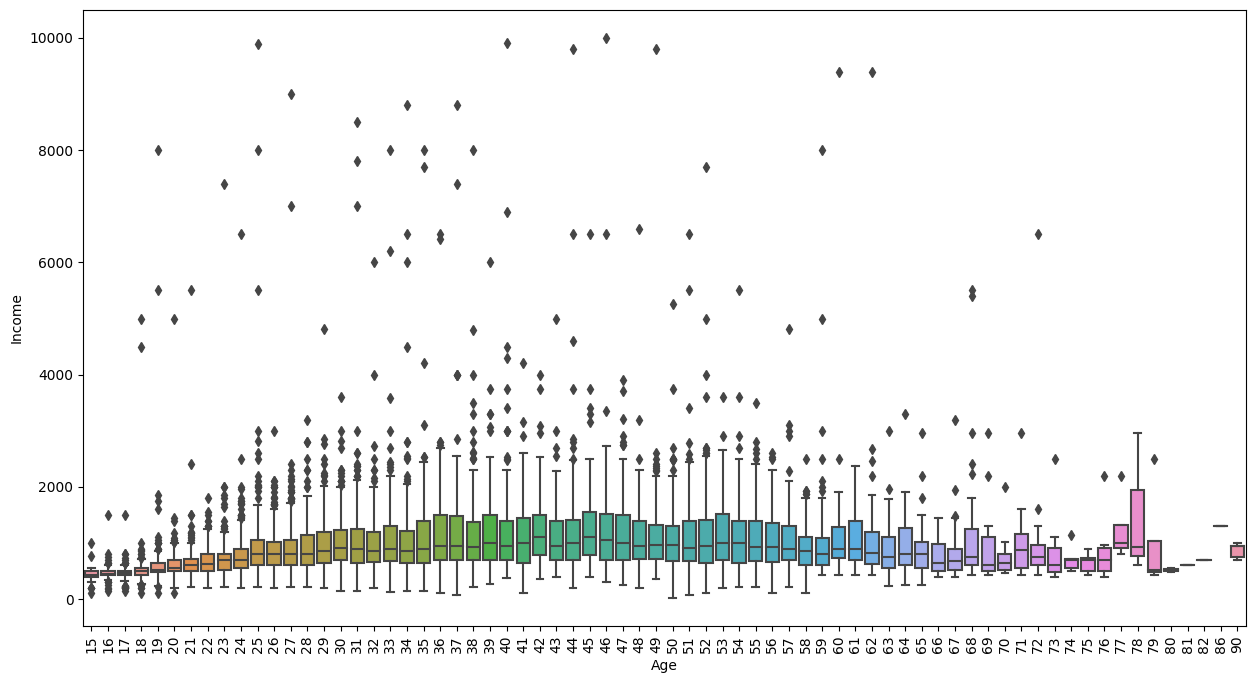

In [217]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=not_zero_income,
    x='Age',
    y='Income',
)
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [219]:
def get_age_bin(age):
    if age <= 18:
        return 0 # 고졸
    elif age > 18 and age <= 22:
        return 1 # 대졸
    elif age > 22 and age <= 30:
        return 2 # 대학원 졸
    elif age > 30 and age <= 40:
        return 3
    elif age > 40 and age <= 50:
        return 4
    elif age > 50 and age <= 60:
        return 5
    elif age > 60:
        return 6

not_zero_income['age_bin'] = not_zero_income.Age.apply(get_age_bin)

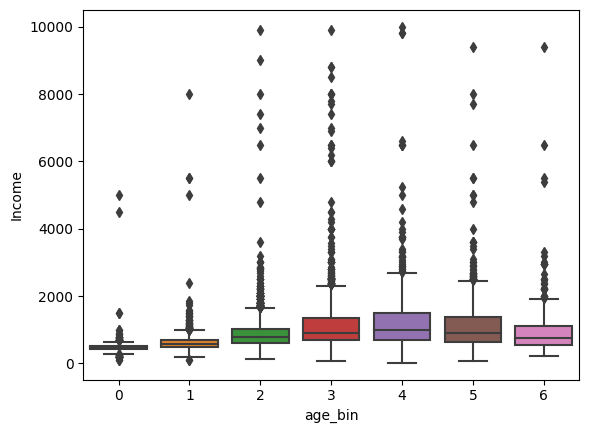

In [222]:
# plt.figure(figsize=(15, 8))
sns.boxplot(
    data=not_zero_income,
    x='age_bin',
    y='Income',
)
plt.xticks(fontsize=10)
plt.show()

### Gender

<Axes: xlabel='Gender', ylabel='Income'>

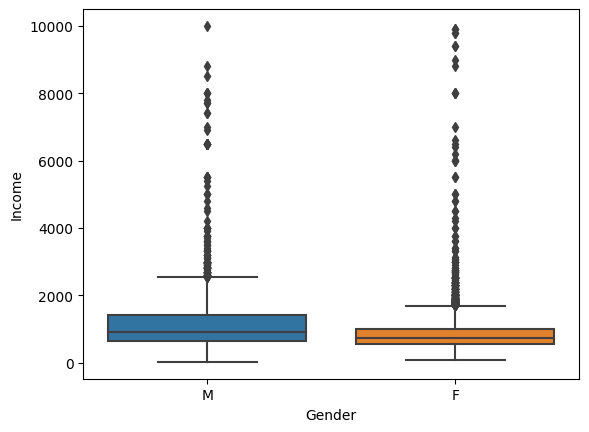

In [192]:
sns.boxplot(
    data=not_zero_income,
    x='Gender',
    y='Income'
)

### Education Status

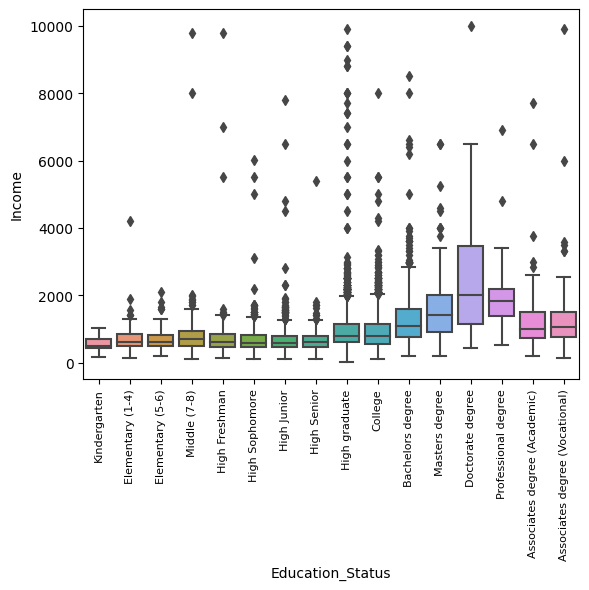

In [208]:
### 교육수준에 따라 임금의 변화가 크게 차이나는 것 발견.

education_order = [
    'Kindergarten',
    'Elementary (1-4)',
    'Elementary (5-6)',
    'Middle (7-8)',
    'High Freshman',
    'High Sophomore',
    'High Junior',
    'High Senior',
    'High graduate',
    'College',
    'Bachelors degree',
    'Masters degree',
    'Doctorate degree',
    'Professional degree',
    'Associates degree (Academic)',
    'Associates degree (Vocational)'
]

sns.boxplot(data=not_zero_income, x='Education_Status', y='Income', order=education_order)
# plt.barh(education_order, groups(train_org, 'Education_Status', zero_income=False).loc[education_order, :]['mean'])
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Working Week

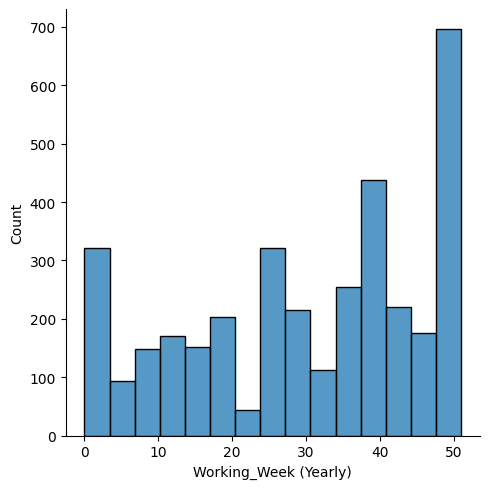

In [211]:
sns.displot(data=not_zero_income.loc[not_zero_income['Working_Week (Yearly)'] != 52], x='Working_Week (Yearly)')

<Axes: xlabel='Working_Week (Yearly)', ylabel='Income'>

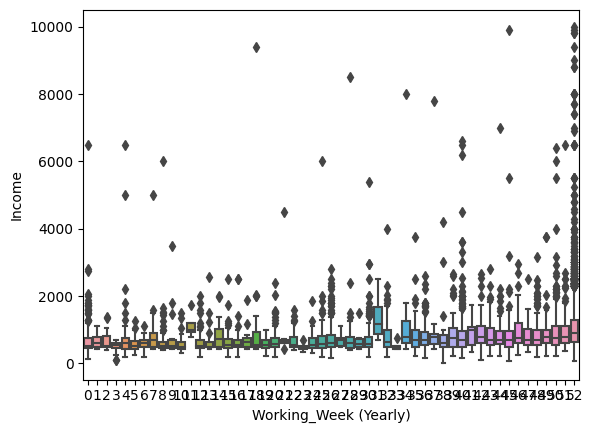

In [212]:
sns.boxplot(data=not_zero_income, x='Working_Week (Yearly)', y='Income')